# Лабораторная работа №1. KMeans с KFolds

Построить метод распознавания для определения тех клиентов банка, которые после рекламного телефонного звонка внесут деньги на срочный депозит. <br>

Информация о клиентах, которым было сделано предложение о срочном вкладе, находится в последнем столбце набора данных. <br>

Описание набора данных: <br>

* данные клиента банка: <br>
1 - age (числовой) <br>
2 - job : тип работы (категория: «админ», «синий воротничок», «предприниматель», «домработница», «управление», «пенсионер», «самозанятый», «услуги», «студент» ,'техник','безработный','неизвестный') <br>
3 - marital: семейное положение (категория: «разведен», «замужем», «холост», «неизвестно»; примечание: «разведен» означает разведенный или овдовевший) <br>
4 - education (категория: 'базовое.4г.','базовое.6л.','базовое.9л.','средняя.школа','неграмотный','профессиональный.курс','университетская.степень','неизвестно') <br>
5 - default: есть кредит по умолчанию? (категория: «нет», «да», «неизвестно») <br>
6 - housing: есть жилищный кредит? (категория: «нет», «да», «неизвестно») <br>
7 - loan: есть личный кредит? (категория: «нет», «да», «неизвестно») <br>
* связанный с последним контактом текущей кампании: <br>
8 - contact: контактный тип связи (категория: 'сотовый', 'телефонный') <br>
9 - month: месяц последнего контакта в году (категория: «январь», «февраль», «март», ..., «ноябрь», «декабрь») <br>
10 - day_of_week: последний контактный день недели (категория: 'пн', 'вт', 'ср', 'чт', 'пт') <br>
11 - duration: продолжительность последнего контакта в секундах (числовое). Важное примечание: этот атрибут сильно влияет на цель вывода (например, если duration=0, то y='no'). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные должны быть включены только для целей сравнительного анализа и должны быть отброшены, если намерение состоит в том, чтобы иметь реалистичную прогностическую модель. <br>
* другие атрибуты: <br>
12 - campaign: количество контактов, выполненных во время этой кампании и для этого клиента (числовое, включая последний контакт) <br>
13 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое число; 999 означает, что с клиентом ранее не связывались) <br>
14 - previous: количество контактов, выполненных до этой кампании и для этого клиента (числовое) <br>
15 - poutcome: результат предыдущей маркетинговой кампании (категория: «неудача», «несуществующий», «успех»). <br>
* атрибуты социального и экономического контекста <br>
16 - emp.var.rate: коэффициент изменения занятости - квартальный индикатор (числовой) <br>
17 - cons.price.idx: индекс потребительских цен - месячный индикатор (числовой) <br>
18 - cons.conf.idx: индекс доверия потребителей - месячный показатель (числовой) <br>
19 - euribor3m: трехмесячная ставка euribor - дневной индикатор (числовой) <br>
20 - nr.employed: количество работников - квартальный показатель (числовой) <br>

Выходная переменная (желаемая цель): <br>
21 - y - клиент оформил срочный вклад? (двоичный: «да», «нет») <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Разделим категориальные и числовые признаки

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# числовые признаки
num_cols = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous'
]
# категориальные признаки
cat_cols = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'y'
]

Посмотрим что из себя представляют наши данные

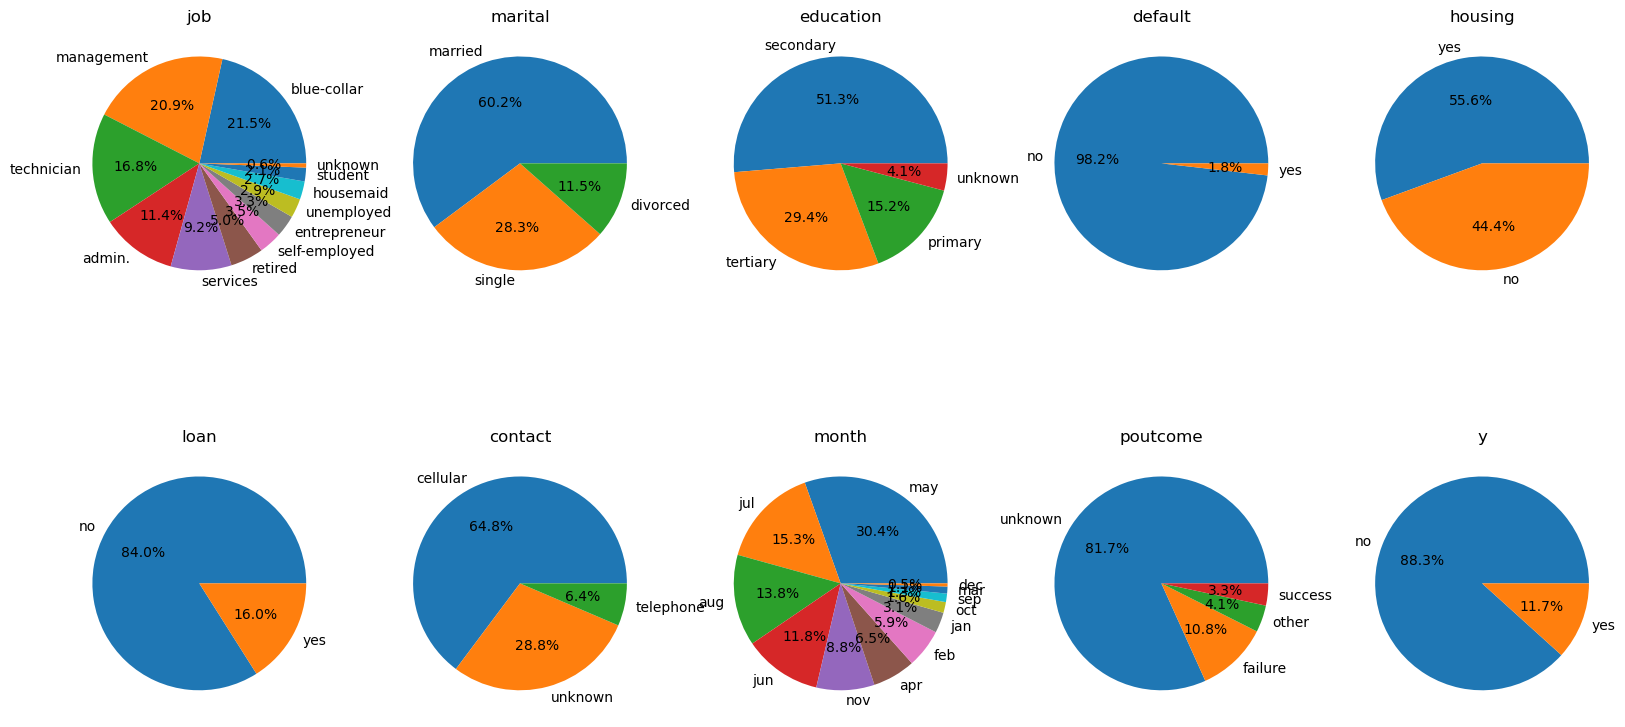

In [5]:
fig,ax=plt.subplots(2,5,figsize=(20,10))
                    
ax = ax.ravel()
                    
for i, column in enumerate(cat_cols):
    serie = df[column].value_counts()
    labels = list(serie.index)
    values = list(serie)
    ax[i].set_title(column)
    ax[i].pie(values,
              labels=labels,
              autopct='%1.1f%%')
plt.show()

По представленым данным можно сделать следующие выводы:
* Предложение сделать срочный вклад было адресовано в основном представителям среднего класса: голубым воротничкам, менеджерам и управляющим
* Большинство клиентов состояли или находятся в браке. Большинство из них имеет семейный капитал
* Большинство клиентов закончили колледж или университет и имеют профессию
* Клиенты в большинстве не имеют кредитов, а значит у них достаточный доход чтобы не пользоваться деньгами банка
* Банк больше всего заинтерисован в срочных вкладах с мая по август
* Только 12% клиентов интересно предложение банка

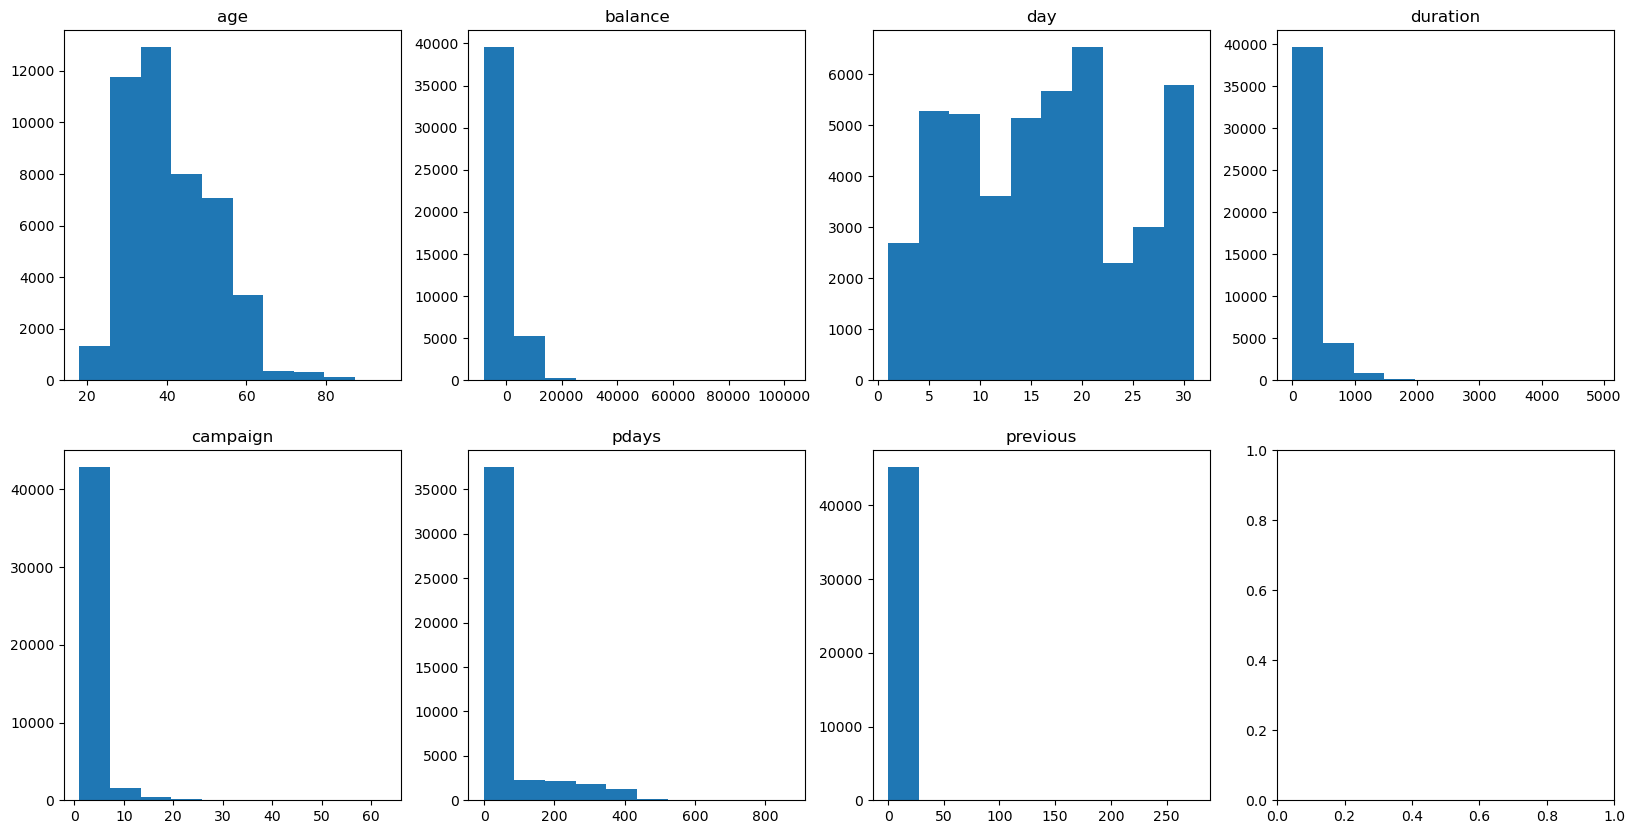

In [6]:
fig,ax=plt.subplots(2,4,figsize=(20,10))
                    
ax = ax.ravel()
                    
for i, column in enumerate(num_cols):
    ax[i].set_title(column)
    ax[i].hist(x=df[column])
plt.show()

В данных присутствуют экстремальные и редкие значения. Обрежем выбросы для представления общей картины

In [7]:
d = df.query('balance > 0 & balance < 15000 & duration < 1500 & campaign < 20 & pdays < 400 & previous < 10')
d.shape, df.shape

((36654, 17), (45211, 17))

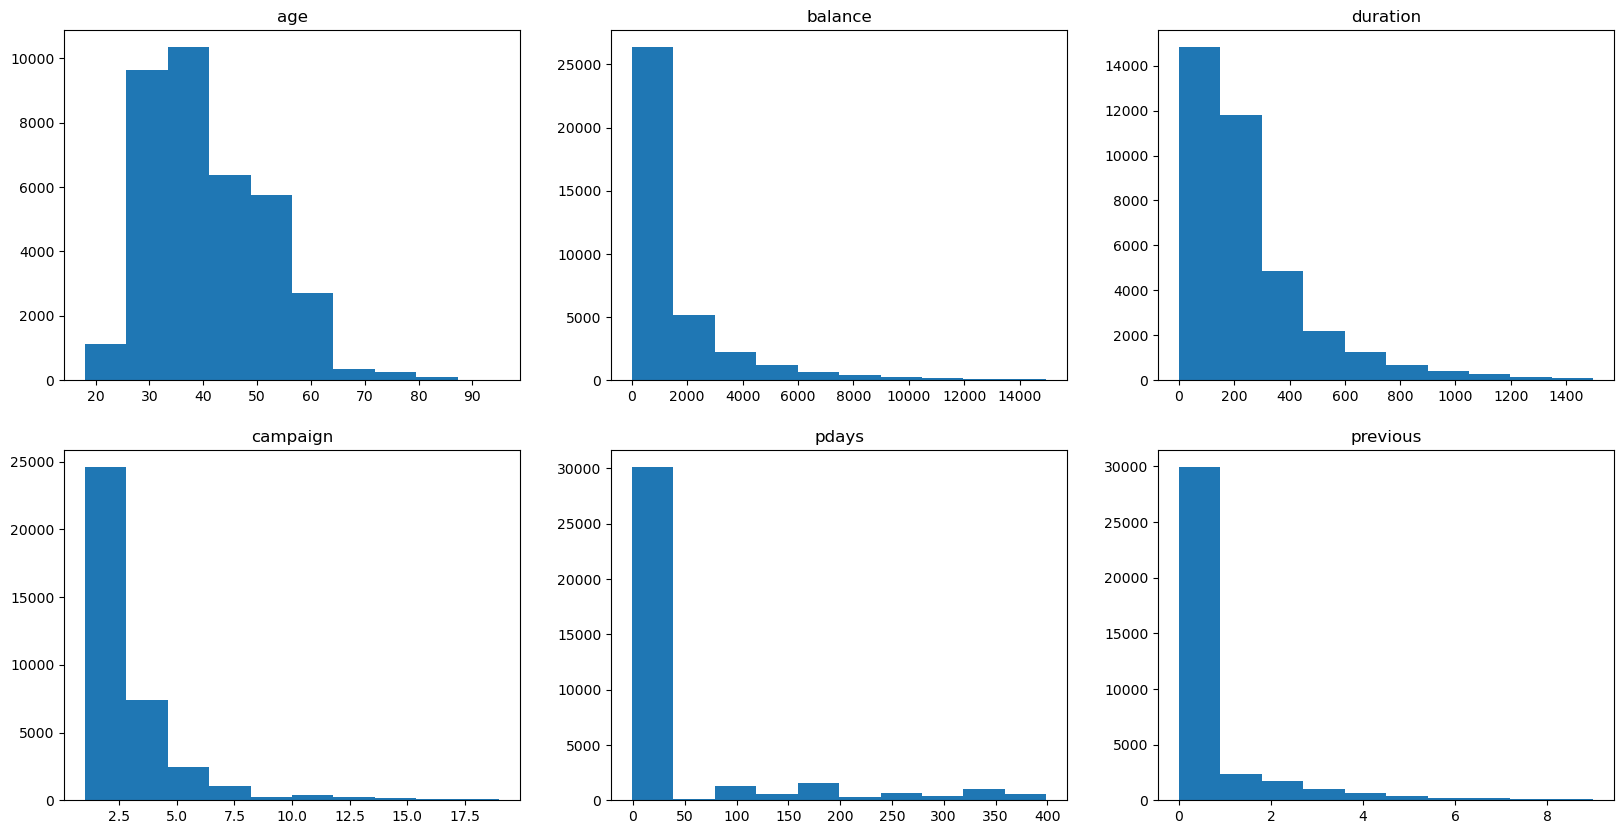

In [8]:
fig,ax=plt.subplots(2,3,figsize=(20,10))
                    
ax = ax.ravel()
new_num_cols = num_cols.copy()
new_num_cols.remove('day')                   
for i, column in enumerate(new_num_cols):
    ax[i].set_title(column)
    ax[i].hist(x=d[column])
plt.show()

По представленым данным можно сделать следующие выводы:
* Предложение делалось клиенту трудоспособного возраста. От 20 до 60 лет
* На счету у клиента в большинстве случаев до 5 000
* Продолжительность звонка в большинстве случаев может доходить до 1000 секунд, а количество звонков клиенту до 10

Преобразуем наши данные

In [9]:
transformer = ColumnTransformer(transformers=[
                                ('num', RobustScaler(), num_cols),
                                ('cat_label', OrdinalEncoder(), cat_cols),
                                ('cat_OH', OneHotEncoder(), cat_cols)
])


In [10]:
d_transformed=transformer.fit_transform(d)

In [11]:
d_transformed.shape

(36654, 63)

Для облегчения обучения алгоритма будем обучать его на данных где нет выбросов

In [12]:
X = d_transformed[:, : -1]
y = d_transformed[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

Для сравнения обучим модель без подбора параметров

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [15]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('train:', accuracy_score(y_train, clf.predict(X_train)).round(3),
      'test:', accuracy_score(y_test, clf.predict(X_test)).round(3),
      'all dataset:', accuracy_score(y, clf.predict(X)).round(3))

Подберем оптимальные параметры обучения модели

In [140]:
params = {'n_clusters': [2],
          'max_iter' : [100, 300, 500, 700],
          'algorithm' : ['lloyd', 'elkan'],
          'init': ['k-means++', 'random']
         }
grd=GridSearchCV(estimator=KMeans(), param_grid=params, scoring='accuracy', cv=5,n_jobs=-1)
grd.fit(X, y)

GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 300, 500, 700], 'n_clusters': [2]},
             scoring='accuracy')

In [141]:
grd.best_score_, grd.best_estimator_

(0.794068232922183, KMeans(algorithm='elkan', n_clusters=2))

In [142]:
clf = KMeans(algorithm='elkan', n_clusters=2)
clf.fit(X_train, y_train)

KMeans(algorithm='elkan', n_clusters=2)

Метрика стала напорядок лучше после подбора параметров

In [143]:
print('train:', accuracy_score(y_train, clf.predict(X_train)).round(3),
      'test:', accuracy_score(y_test, clf.predict(X_test)).round(3),
      'all dataset:', accuracy_score(y, clf.predict(X)).round(3))

train: 0.794 test: 0.791 all dataset: 0.794


Посмотрим как модель справляется с изначальным набором данных, в которых есть выбросы и удаленные наблюдения

In [150]:
df.shape[0] - d.shape[0], f'{(df.shape[0] * 100 ) // d.shape[0] - 100}%'

(8557, '23%')

Модель хорошо справляется с данными, в которых присутствует почти четверть наблюдений, которых она до этого не встречала

In [145]:
df_transformed=transformer.transform(df)
X = df_transformed[:, : -1]
y = df_transformed[:, -1]
print('all dataset:', accuracy_score(y, clf.predict(X)).round(3))

all dataset: 0.797
